# Introduction to Seaborn


## Python Visualization Landscape

The python visualization landscape is complex and can be overwhelming.

<center>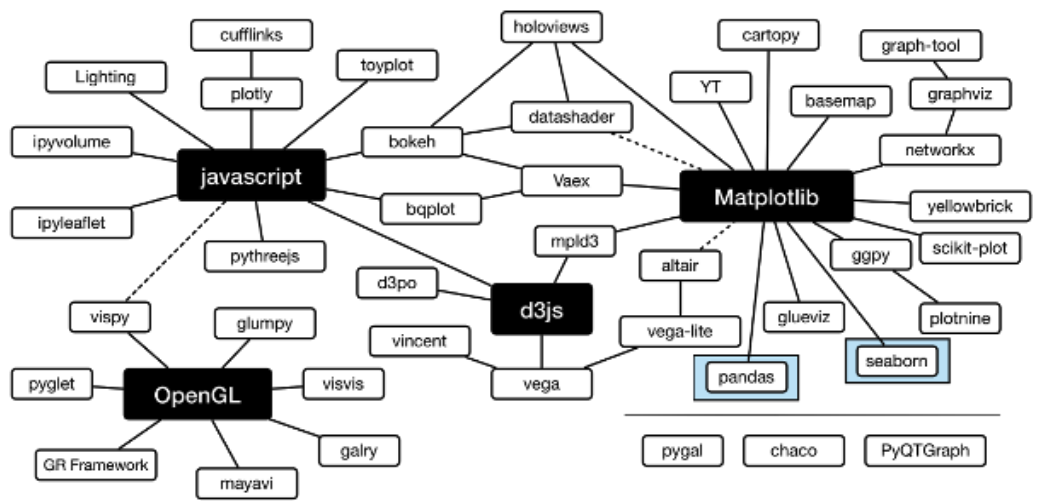</center>

Matplotlib provides the raw building blocks for Seaborn's visualizations and it can also be used on its own. As we can see Pandas also supports basic plotting capability.

## Anatomy of a Figure

<center>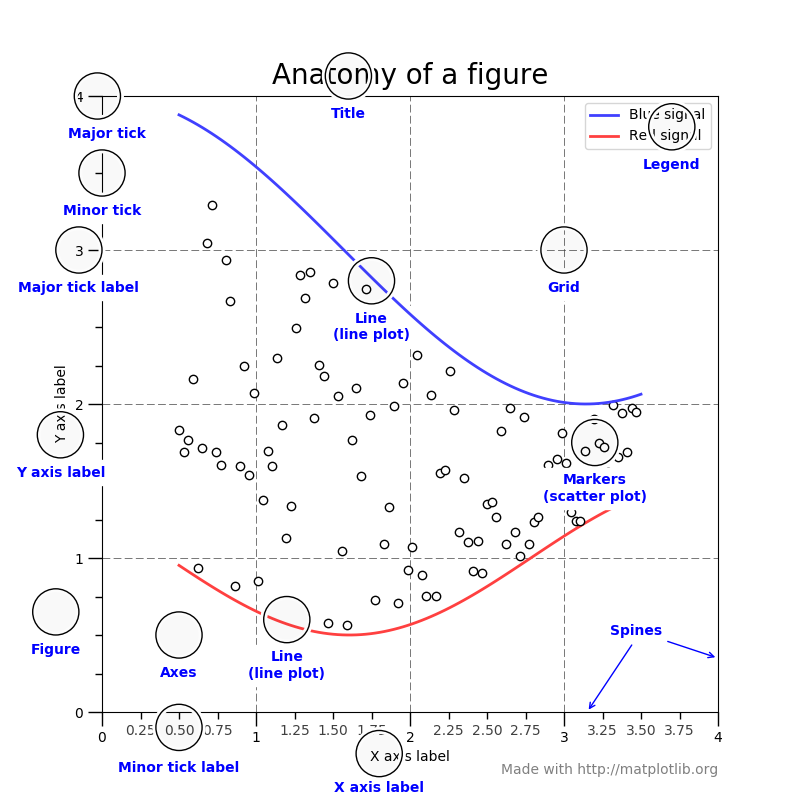</center>


## Seaborn vs. Matplotlib
Seaborn is a visualisation library useful for creating statistical graphs in Python. It provides appealing default styles and colour palettes to enhance the visual impact of statistical graphs. It is built on top of the matplotlib library and is also integrated in terms of pandas data structures.

Why should we learn Seaborn if we already knwo Matplotlib?

* Matplotlib is mainly deployed for basic plotting. It is highly customizable and doing sophisticated visualization is possible, however it requires a lot of boilerplate code. And since it predated Pandas by more than a decade, it is not designed for use with Pandas `DataFrame`.
* Seaborn in the other hand specializes in statistics visualization and is more integrated to work with pandas and provides a lot of commonly used themes.

So if you are doing stats then seaborn is a good choice.  
Here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors:

In [1]:
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt

In [2]:
# Disable jedi autocompleter
%config Completer.use_jedi = False

plt.rcParams['figure.figsize'] = 9, 4

In [3]:
# Create random walk data:
rwlk = np.random.RandomState(123)
x = np.linspace(0, 10, 500)
y = np.cumsum(rwlk.randn(500, 6), 0)

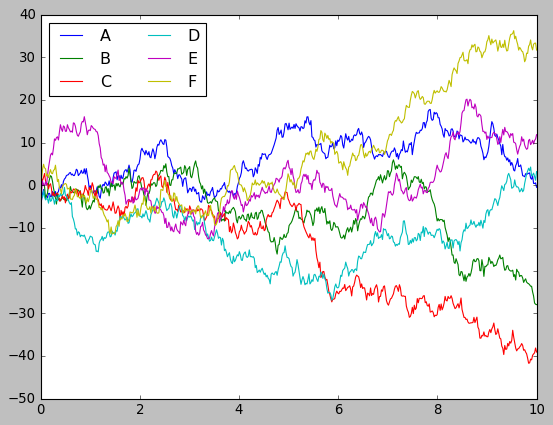

In [4]:
# Plot the data with Matplotlib defaults
plt.style.use('classic')
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Now let's plot the same data using seaborn. By convension, Seaborn is imported as `sns`:

In [5]:
import seaborn as sns
sns.set()

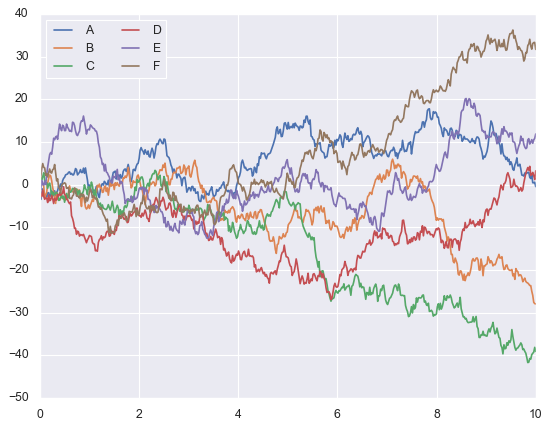

In [6]:
# same plotting code as above
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Although we used the same plotting code for both figures and the results of both plots contain all the information we'd like to convey, seaborn plot resutl is aesthetically more pleasing, isn't it?

## Setting Styles

Seaborn has default configurations that can be applied with `sns.set()`. These styles can override matplotlib and pandas plots as well. It comes with five built-in themes to syle its plots: `dark`, `whitegrid`, `dark`, `white` and `ticks`.

To use any of the preset themes use `sns.set_style()`

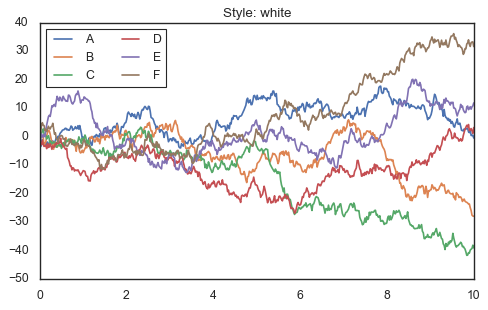

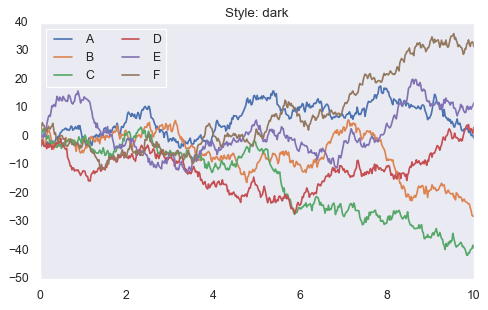

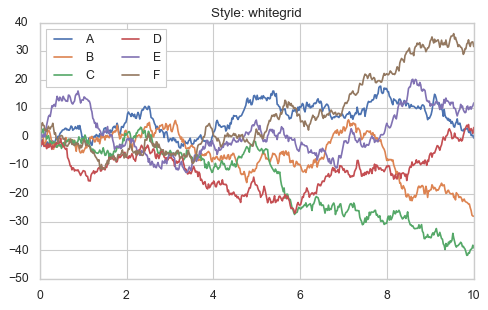

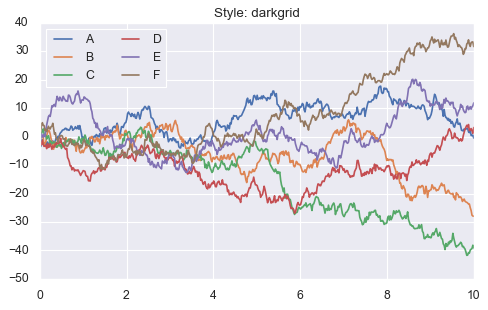

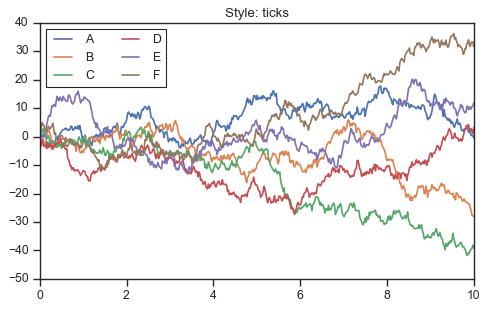

In [7]:
styles = ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks']
for style in styles:
    sns.set_style(style)
    plt.figure(figsize=(7,4))
    plt.plot(x, y)
    plt.title(f'Style: {style}')
    plt.legend('ABCDEF', ncol=2, loc='upper left');

Note: Matplotlib has some other pretty styles integrated, that you can use with seaborn too:

In [8]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Exploring Seaborn Plots

The core feature of Seaborn is to provide high-level commands to create with less code a variety of chart types that are useful for exploring statistical data and even creating some statistical models.  

Let's take a look at some of the chart types available in Seaborn using `employee.csv` dataset:

In [9]:
df = pd.read_csv('data/employee.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Bar Charts

A bar chart or bar graph is a chaart that presents categorical data with rectengular bars with hights or lengths proportional to the values that they represent. Can be plotted vertically or horizontally.

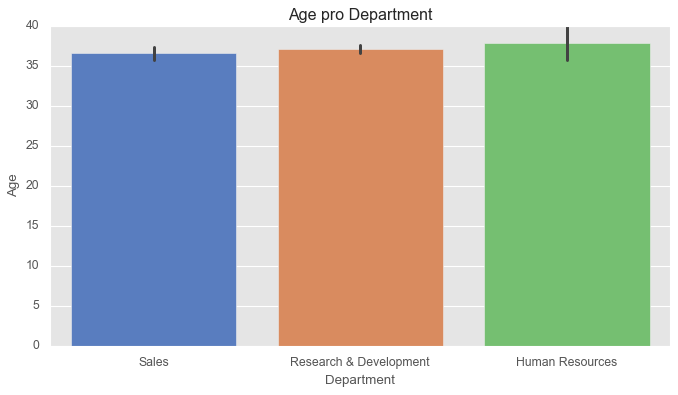

In [22]:
plt.rcParams["figure.figsize"] = 10, 5
sns.barplot(x=df['Department'],
            y=df['Age'],
            palette='muted')
plt.title('Age pro Department');

Seaborn in fact has six variations of matplotlib’s palette, called deep, muted, pastel, bright, dark, and colorblind. These span a range of average luminance and saturation values:

In [23]:
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [24]:
sns.color_palette("magma_r", 8)

[(0.996369, 0.791167, 0.553499),
 (0.992196, 0.587502, 0.406299),
 (0.944006, 0.377643, 0.365136),
 (0.804752, 0.249911, 0.442102),
 (0.620005, 0.18384, 0.497524),
 (0.445163, 0.122724, 0.506901),
 (0.265447, 0.060237, 0.46184),
 (0.092949, 0.059904, 0.239164)]

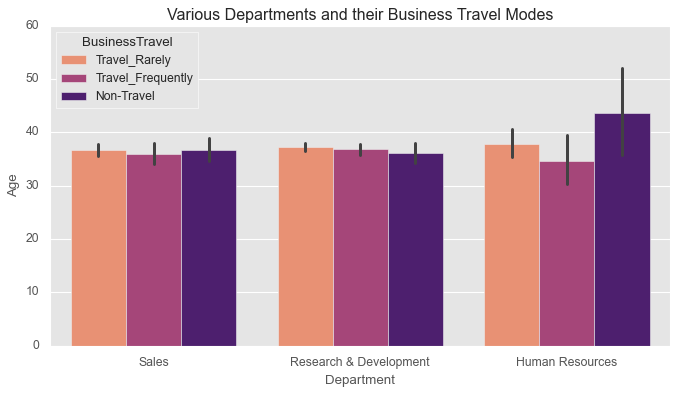

In [25]:
# plotting the chart
sns.barplot(x=df['Department'], y=df['Age'], 
            hue=df['BusinessTravel'], 
            palette='magma_r')
plt.title('Various Departments and their Business Travel Modes');

### Count Plots

`countplot()` method is used to Show the counts of observations in each categorical bin using bars.

/Users/athena/opt/miniconda3/envs/mlpocref/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


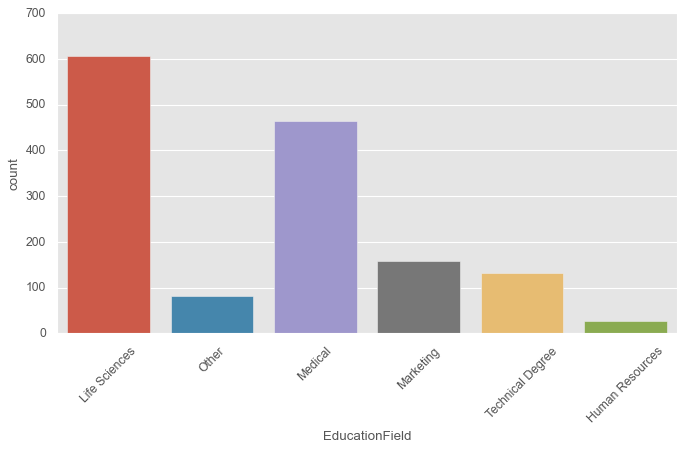

In [26]:
# plotting a simple count plot
sns.countplot(df['EducationField'])
plt.xticks(rotation = 45)
plt.show()

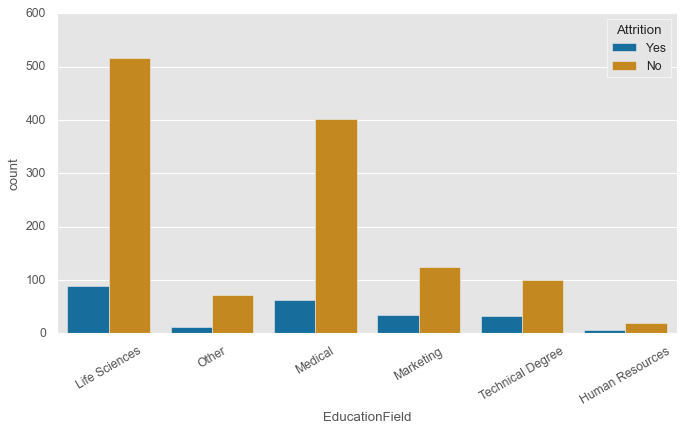

In [27]:
# plotting a count plot with hue
sns.countplot(x=df['EducationField'],
              hue=df['Attrition'],
              palette='colorblind')
plt.xticks(rotation=30);

### Line Charts

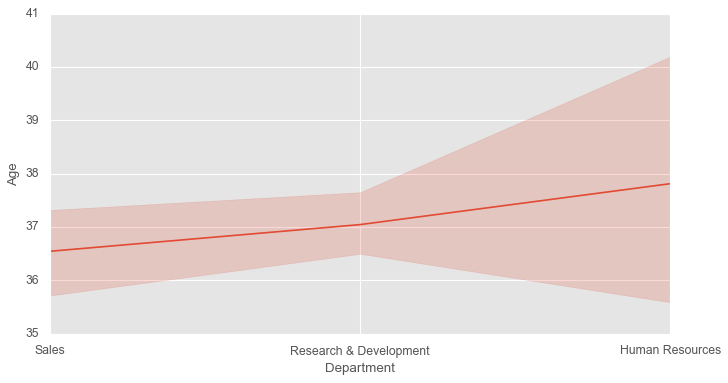

In [28]:
# lets plot a simple line plot
sns.lineplot(x=df['Department'],
             y=df['Age']);
# 'Avg. Age of Employees in different Departments'

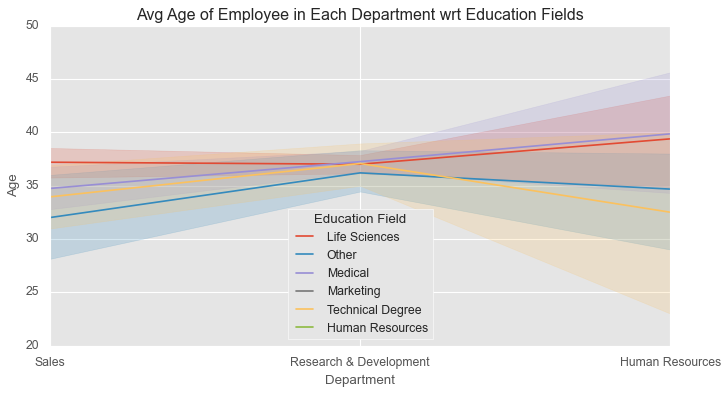

In [29]:
# lets introduce a hue into the plot
plt.style.use('ggplot')
sns.lineplot(x=df['Department'],
             y=df['Age'],
             hue=df['EducationField'])
plt.legend(loc='lower center', title='Education Field')
plt.title('Avg Age of Employee in Each Department wrt Education Fields');

### Scatter Charts

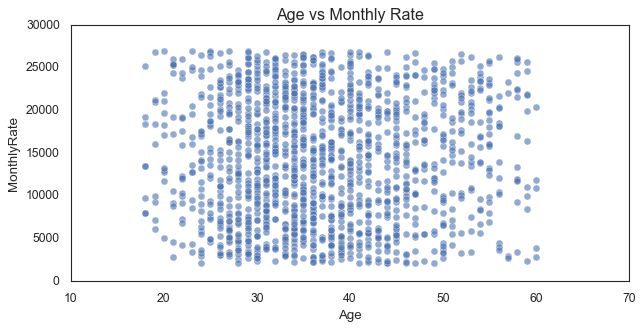

In [18]:
sns.set_style('white')
# scatter plot
sns.scatterplot(x=df['Age'],
                y=df['MonthlyRate'], s=40, alpha=.6)
plt.title('Age vs Monthly Rate');

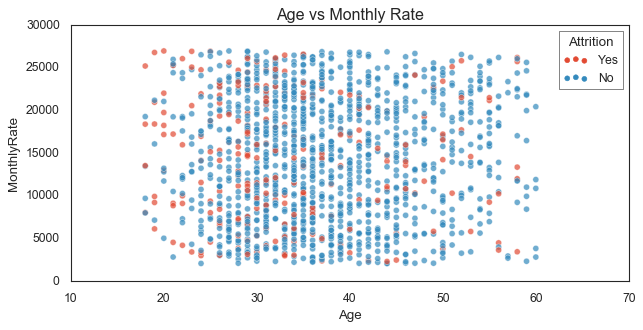

In [19]:
# lets add a hue element in the data
sns.scatterplot(x=df['Age'],
                y=df['MonthlyRate'],
                hue=df['Attrition'], s=30, alpha=.7)
plt.title('Age vs Monthly Rate')
plt.show()